In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBClassifier

In [2]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [37]:
from sklearn.metrics import plot_confusion_matrix

In [18]:
plt.rcParams['figure.figsize'] = (10,10)

In [4]:
data=pd.read_csv("data/modeling_numeric.csv",index_col=None)

In [29]:
data.head()

,Winner,weight_class,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,...,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_diff_red-blue,height_diff_red-blue
0,1,4,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,...,0.050000,110.500000,43.300000,162.56,162.56,135.0,31.0,32.0,0.0,-5.08
1,1,3,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,...,0.147143,158.142857,82.285714,165.10,167.64,125.0,32.0,31.0,0.0,-2.54
2,1,8,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,...,0.131333,102.133333,38.600000,180.34,193.04,155.0,36.0,35.0,0.0,-5.08
3,0,4,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,...,0.000000,115.125000,48.875000,162.56,172.72,135.0,26.0,29.0,0.0,-7.62
4,0,12,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,0.000000,...,0.000000,60.500000,27.750000,187.96,190.50,264.0,32.0,26.0,14.0,7.62


In [6]:
data1=pd.read_csv("data/modeling_numeric2.csv", index_col=None)

In [28]:
data1.head()

,Winner,weight_class,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,1,4,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,...,4.0,2.0,0.0,0.0,1,162.56,162.56,135.0,31.0,32.0
1,1,3,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,...,2.0,0.0,2.0,0.0,2,165.10,167.64,125.0,32.0,31.0
2,1,8,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,...,3.0,3.0,6.0,1.0,1,180.34,193.04,155.0,36.0,35.0
3,0,4,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,...,4.0,1.0,0.0,0.0,1,162.56,172.72,135.0,26.0,29.0
4,0,12,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,...,1.0,2.0,0.0,0.0,2,187.96,190.50,264.0,32.0,26.0


In [23]:
data.shape

(3307, 109)

In [25]:
data1.shape

(3307, 129)

In [26]:
data.drop('title_bout',axis=1,inplace=True)

In [27]:
data1.drop('title_bout',axis=1,inplace=True)

In [ ]:
#Normalize data with Standard Scaler
# std = StandardScaler()
# df_num = numerical.select_dtypes(include=[np.float, np.int])
# data[list(data.columns)] = std.fit_transform(data[list(data.columns)])

In [10]:
model = XGBClassifier()

In [30]:
X = data.drop(['Winner'], axis=1)
y = data['Winner']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [31]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
model.score(X_test, y_test)

0.6469165659008465

In [33]:
model.feature_importances_

array([0.0084214 , 0.01434917, 0.00900585, 0.00981733, 0.01096271,
       0.00830386, 0.0146357 , 0.01094132, 0.00624876, 0.01061425,
       0.00910297, 0.00453348, 0.00848665, 0.01052747, 0.00922767,
       0.00720344, 0.01732082, 0.00948897, 0.00644   , 0.00833253,
       0.01063941, 0.00691022, 0.0097194 , 0.00967485, 0.00948911,
       0.00963767, 0.00878477, 0.00716098, 0.00583206, 0.00827115,
       0.01086466, 0.01124036, 0.00528832, 0.0093667 , 0.00845007,
       0.0123817 , 0.00944946, 0.00949231, 0.00587463, 0.00945455,
       0.00990814, 0.0094915 , 0.00947288, 0.00812033, 0.00930801,
       0.00856016, 0.00989542, 0.01255329, 0.00895113, 0.00619165,
       0.01138021, 0.00726318, 0.01058445, 0.01028614, 0.00785945,
       0.0077405 , 0.00870999, 0.00757735, 0.01046868, 0.00910162,
       0.00952689, 0.00683675, 0.00814832, 0.0070614 , 0.00596683,
       0.00802944, 0.01417174, 0.0065495 , 0.01173839, 0.00688213,
       0.00971528, 0.0074523 , 0.00808686, 0.00943921, 0.01313

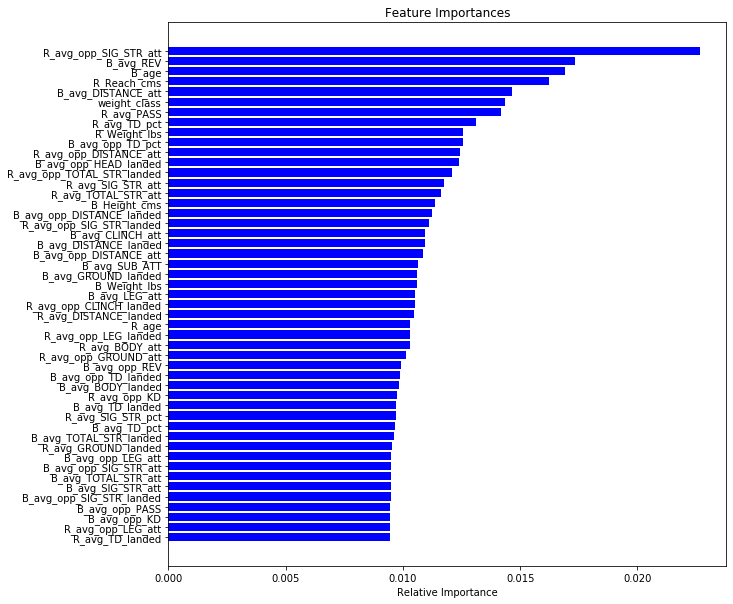

In [35]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-49:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

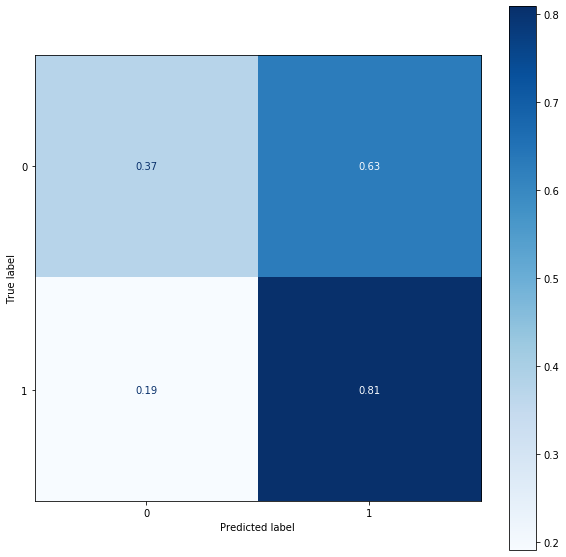

In [39]:
predictions = model.predict(X_test) #1=Red, 0=Blue

# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')